131

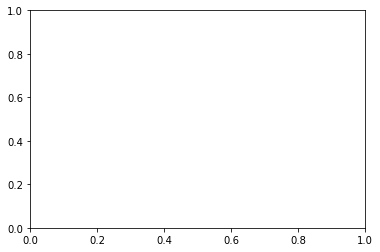

In [1]:
import numpy as np, matplotlib.pyplot as plt, plot, pickle
from utils import *
from config import *

with open('data_upsample.backup', 'rb') as f:
    data = pickle.load(f)
len(data)

In [6]:
def getFromId(mapId, trajId):
    return next(filter(lambda e: e['mapId'] == mapId and e['trajId'] == trajId, data))
def idToColor(id):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
    return colors[id % len(colors)]

Text(0.5, 1.0, 'Average duration for 10 scenarios in the same map (solid: Phi*, dashed: Theta*)')

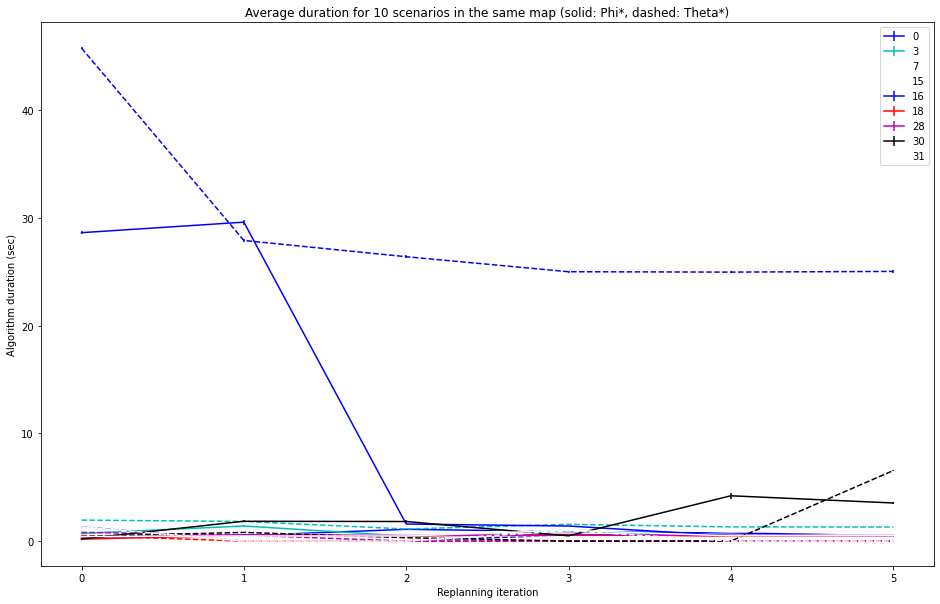

In [7]:
plt.figure(figsize=(16,10))
for i in [0, 3, 7, 15, 16, 18, 28, 30, 31]:
    sample = getFromId(i, 0)
    plt.errorbar(range(BLOCKED_CELLS_LOOP+1), sample['durationsPhiMean'], yerr=sample['durationsPhiStd'], color=idToColor(i), label='{}'.format(i))
    plt.errorbar(range(BLOCKED_CELLS_LOOP+1), sample['durationsThetaMean'], yerr=sample['durationsThetaStd'], fmt='--', color=idToColor(i))
plt.xlabel('Replanning iteration')
plt.ylabel('Algorithm duration (sec)')
plt.legend()
plt.title('Average duration for 10 scenarios in the same map (solid: Phi*, dashed: Theta*)')


In [84]:
def durationVSPlot(replanning=0):
    phiMean = []
    phiStd = []
    thetaMean = []
    thetaStd = []
    for sample in data:
        if sample['durationsPhiStd'][replanning] > 10:
            continue
        phiMean.append(sample['durationsPhiMean'][replanning])
        phiStd.append(sample['durationsPhiStd'][replanning])
        thetaMean.append(sample['durationsThetaMean'][replanning])
        thetaStd.append(sample['durationsThetaStd'][replanning])
    plt.errorbar(thetaMean, phiMean, xerr=thetaStd, yerr=phiStd, ecolor='m', elinewidth=1, errorevery=1, 
                 fmt='o', markersize=5, alpha=.8, label='Average duration')
    plt.plot([0,50], [0,50], color='r', alpha=.8, linewidth=1, label='Identity line')
    plt.xlabel('Theta* running time (sec)')
    plt.ylabel('Phi* running time (sec)')
    plt.legend()
    plt.xlim(-1, 55)
    plt.ylim(-1, 55)
    #plt.title('Planning {}'.format(replanning))


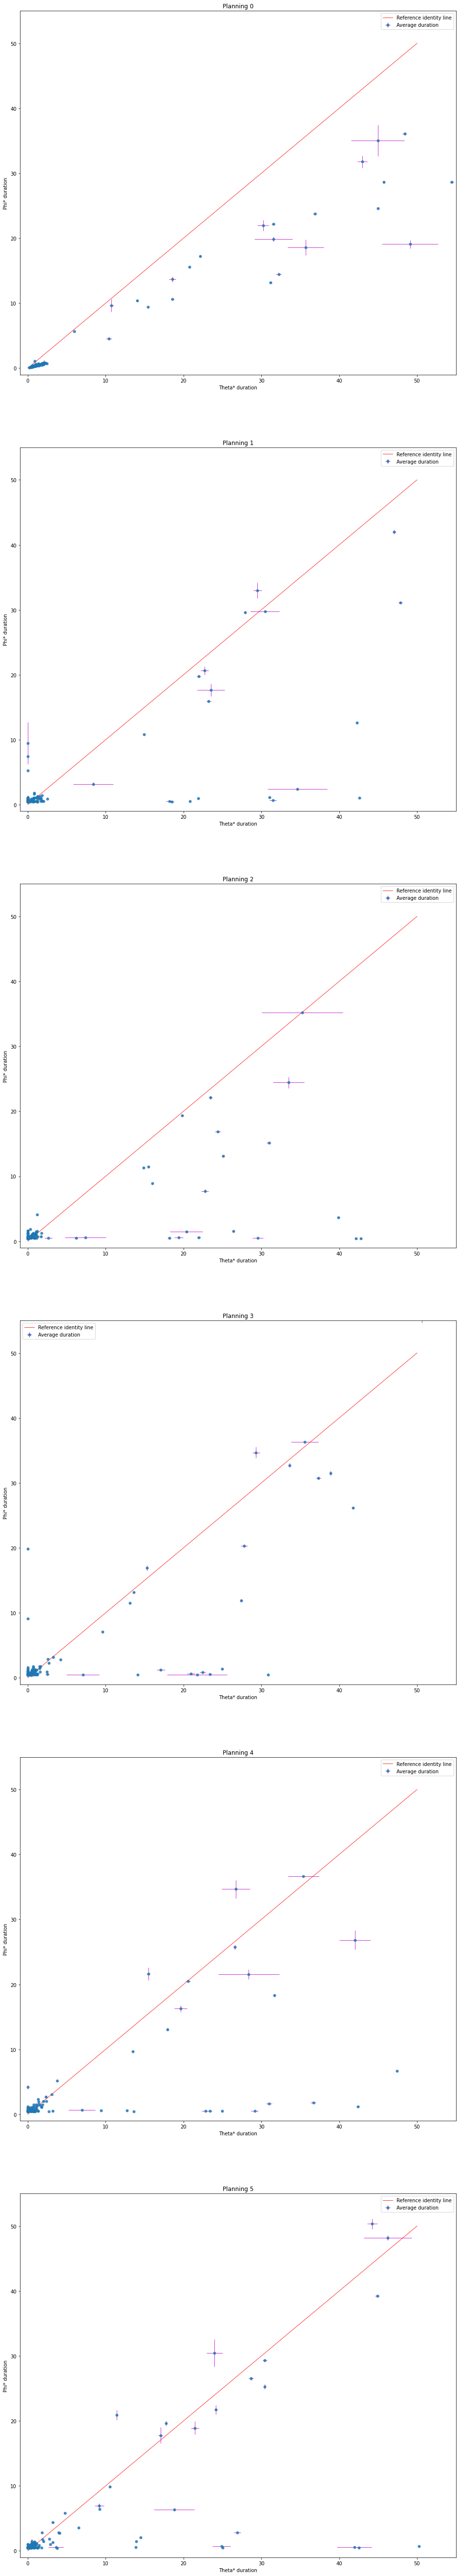

In [48]:
plt.figure(figsize=(16, 16*6))
plt.subplot(611)
durationVSPlot(0)
plt.subplot(612)
durationVSPlot(1)
plt.subplot(613)
durationVSPlot(2)
plt.subplot(614)
durationVSPlot(3)
plt.subplot(615)
durationVSPlot(4)
plt.subplot(616)
durationVSPlot(5)

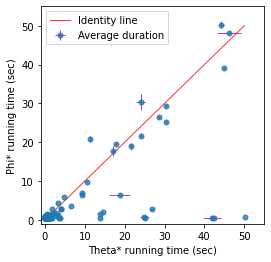

In [91]:
i = 5
plt.figure(figsize=(4, 4))
durationVSPlot(i)
plt.savefig('figures/planning_{}.png'.format(i), bbox_inches='tight')

Text(0.5, 1.0, 'Phi*/Theta* duration comparison between the initial planning and the first replanning (N=50)')

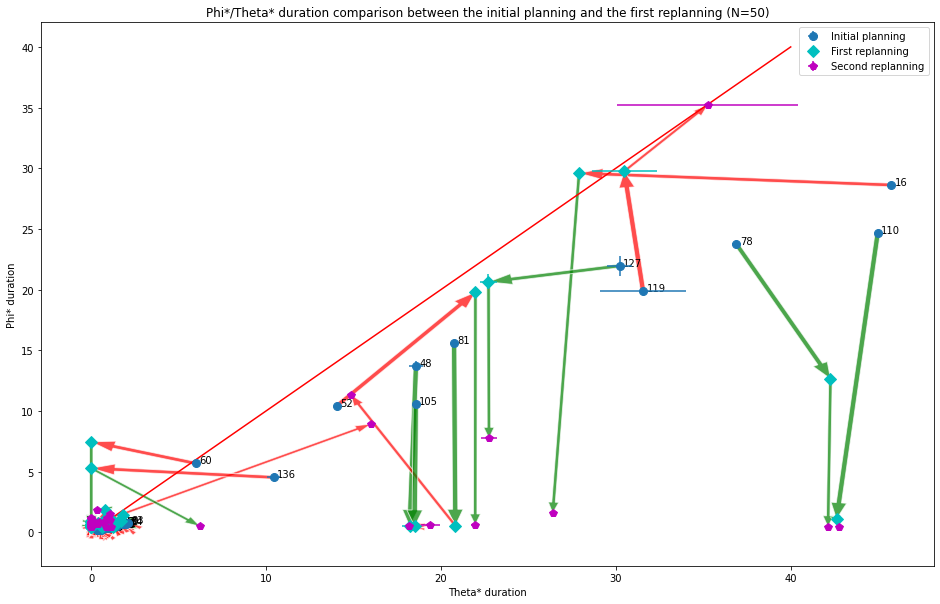

In [8]:
phiMean, thetaMean, phiMean1, thetaMean1, phiMean2, thetaMean2 = [], [], [], [], [], []
phiStd, thetaStd, phiStd1, thetaStd1, phiStd2, thetaStd2 = [], [], [], [], [], []
plt.figure(figsize=(16,10))
for sample in data[:50]:
    x, y, stdx, stdy = sample['durationsThetaMean'][0], sample['durationsPhiMean'][0], sample['durationsThetaStd'][0], sample['durationsPhiStd'][0]
    x1, y1, stdx1, stdy1 = sample['durationsThetaMean'][1], sample['durationsPhiMean'][1], sample['durationsThetaStd'][1], sample['durationsPhiStd'][1]
    x2, y2, stdx2, stdy2 = sample['durationsThetaMean'][2], sample['durationsPhiMean'][2], sample['durationsThetaStd'][2], sample['durationsPhiStd'][2]
    phiMean.append(y); phiStd.append(stdy)
    thetaMean.append(x); thetaStd.append(stdx)
    phiMean1.append(y1); phiStd1.append(stdy1)
    thetaMean1.append(x1); thetaStd1.append(stdx1)
    phiMean2.append(y2); phiStd2.append(stdy2)
    thetaMean2.append(x2); thetaStd2.append(stdx2)
    
    plt.arrow(x, y, x1-x, y1-y, width=.3, 
              length_includes_head=True, ec='w', fc='r' if y1>y else 'g', alpha=.7)
    plt.arrow(x1, y1, x2-x1, y2-y1, width=.2, 
              length_includes_head=True, ec='w', fc='r' if y2>y1 else 'g', alpha=.7)
    plt.text(x+.2, y, '{}'.format(sample['mapId']))
    #plt.text(x2+.2, y2, '{:.2f}'.format(sample['durationsPhiMean'][2]))
plt.errorbar(thetaMean, phiMean, xerr=thetaStd, yerr=phiStd, fmt='o', zorder=10, label='Initial planning', ms=8)
plt.errorbar(thetaMean1, phiMean1, xerr=thetaStd1, yerr=phiStd1, fmt='o', marker='D', color='c', zorder=11, ms=8, label='First replanning')
plt.errorbar(thetaMean2, phiMean2, xerr=thetaStd2, yerr=phiStd2, fmt='o', marker='p', color='m', zorder=11, ms=8, label='Second replanning')
plt.plot([0,40], [0,40], color='r')
plt.xlabel('Theta* duration')
plt.ylabel('Phi* duration')
plt.legend()
plt.title('Phi*/Theta* duration comparison between the initial planning and the first replanning (N={})'.format(len(phiMean)))

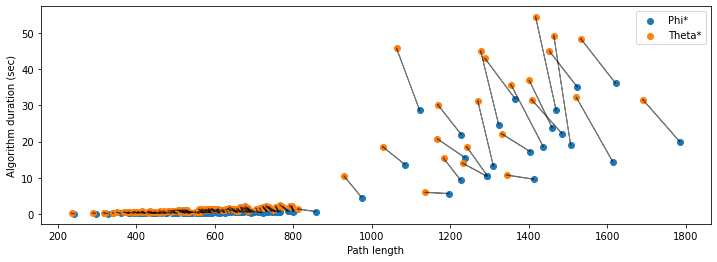

In [92]:
phiDur = [e['durationsPhiMean'][0] for e in data]
thetaDur = [e['durationsThetaMean'][0] for e in data]
phiLen = [e['lengthsPhi'][0] for e in data]
thetaLen = [e['lengthsTheta'][0] for e in data]

plt.figure(figsize=(12,4))
plt.scatter(phiLen, phiDur, label='Phi*')
plt.scatter(thetaLen, thetaDur, label='Theta*')
plt.xlabel('Path length')
plt.ylabel('Algorithm duration (sec)')
plt.legend()

for x1, y1, x2, y2 in zip(phiLen, phiDur, thetaLen, thetaDur):
    plt.arrow(x1, y1, x2-x1, y2-y1, width=.1, alpha=.5)

plt.savefig('figures/planning_lengths.png', bbox_inches='tight')